In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import pathlib

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.10
Tensorflow version: 2.4.1
Keras version: 2.4.0


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

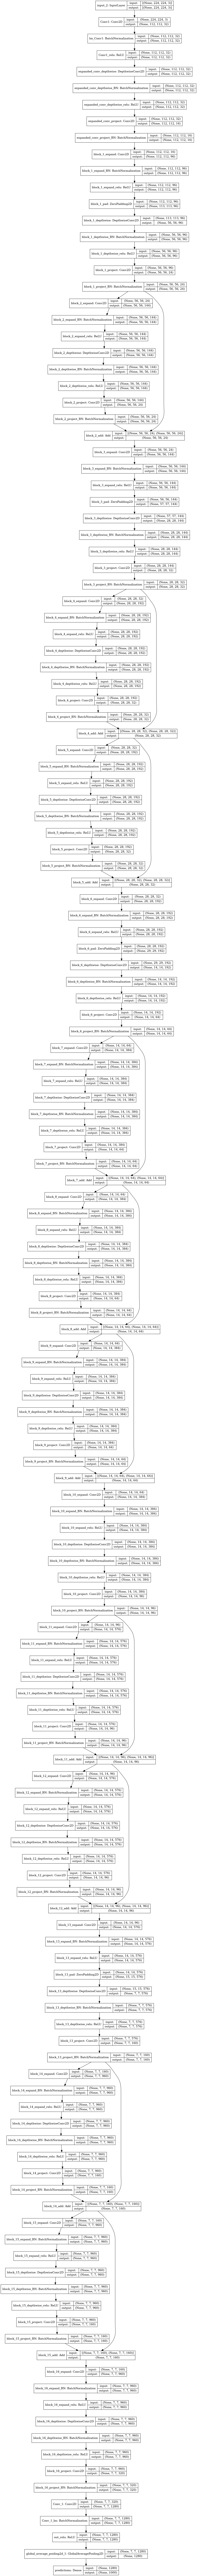

In [5]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]
model = tf.keras.applications.MobileNetV2()
model.summary()
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)



In [11]:
LABELS_URL = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
print()
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', LABELS_URL)
labels = np.array(
    open(labels_path).read().splitlines()
)[1:]
print('Labels shape:', labels.shape)
print(labels)



Labels shape: (1000,)
['tench' 'goldfish' 'great white shark' 'tiger shark' 'hammerhead'
 'electric ray' 'stingray' 'cock' 'hen' 'ostrich' 'brambling' 'goldfinch'
 'house finch' 'junco' 'indigo bunting' 'robin' 'bulbul' 'jay' 'magpie'
 'chickadee' 'water ouzel' 'kite' 'bald eagle' 'vulture' 'great grey owl'
 'European fire salamander' 'common newt' 'eft' 'spotted salamander'
 'axolotl' 'bullfrog' 'tree frog' 'tailed frog' 'loggerhead'
 'leatherback turtle' 'mud turtle' 'terrapin' 'box turtle' 'banded gecko'
 'common iguana' 'American chameleon' 'whiptail' 'agama' 'frilled lizard'
 'alligator lizard' 'Gila monster' 'green lizard' 'African chameleon'
 'Komodo dragon' 'African crocodile' 'American alligator' 'triceratops'
 'thunder snake' 'ringneck snake' 'hognose snake' 'green snake'
 'king snake' 'garter snake' 'water snake' 'vine snake' 'night snake'
 'boa constrictor' 'rock python' 'Indian cobra' 'green mamba' 'sea snake'
 'horned viper' 'diamondback' 'sidewinder' 'trilobite' 'harves

In [13]:
def load_image(image_path):
    return tf.keras.preprocessing.image.load_img(
        image_path,
        target_size=[INPUT_IMAGE_SIZE, INPUT_IMAGE_SIZE]
    )

def image_to_array(image):
    return tf.keras.preprocessing.image.img_to_array(image, dtype=np.int32)

def display_image(image_np):
    plt.figure()
    plt.imshow(image_np)

TEST_IMAGES_DIR_PATH = pathlib.Path('data')
TEST_IMAGE_PATHS = sorted(list(TEST_IMAGES_DIR_PATH.glob('*.jpg')))
TEST_IMAGE_PATHS
test_images = []

for image_path in TEST_IMAGE_PATHS:
    # <PIL.Image.Image image mode=RGB size=224x224 at 0x141247ED0>
    test_image = load_image(image_path)
    test_image_array = image_to_array(test_image)
    test_images.append(test_image_array)
    display_image(test_image_array)